In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud


In [60]:
df = pd.read_csv("data_job_posts.csv")

In [61]:
columns = df.columns
print("Columns:", columns)

Columns: Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary',
       'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach',
       'Year', 'Month', 'IT'],
      dtype='object')


In [62]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   jobpost           19001 non-null  object
 1   date              19001 non-null  object
 2   Title             18973 non-null  object
 3   Company           18994 non-null  object
 4   AnnouncementCode  1208 non-null   object
 5   Term              7676 non-null   object
 6   Eligibility       4930 non-null   object
 7   Audience          640 non-null    object
 8   StartDate         9675 non-null   object
 9   Duration          10798 non-null  object
 10  Location          18969 non-null  object
 11  JobDescription    15109 non-null  object
 12  JobRequirment     16479 non-null  object
 13  RequiredQual      18517 non-null  object
 14  Salary            9622 non-null   object
 15  ApplicationP      18941 non-null  object
 16  OpeningDate       18295 non-null  object
 17  Deadline    

In [63]:
columns_to_keep = ['jobpost', 'Title', 'Salary', 'date', 'Company', 'Eligibility', 'Duration', 'Location', 'JobRequirment']
data = df[columns_to_keep]

In [64]:
print (data.head)


<bound method NDFrame.head of                                                  jobpost  \
0      AMERIA Investment Consulting Company\r\nJOB TI...   
1      International Research & Exchanges Board (IREX...   
2      Caucasus Environmental NGO Network (CENN)\r\nJ...   
3      Manoff Group\r\nJOB TITLE:  BCC Specialist\r\n...   
4      Yerevan Brandy Company\r\nJOB TITLE:  Software...   
...                                                  ...   
18996  Technolinguistics NGO\r\n\r\n\r\nTITLE:  Senio...   
18997  "Coca-Cola Hellenic Bottling Company Armenia" ...   
18998  "Coca-Cola Hellenic Bottling Company Armenia" ...   
18999  San Lazzaro   LLC\r\n\r\n\r\nTITLE:  Head of O...   
19000  "Kamurj" UCO CJSC\r\n\r\n\r\nTITLE:  Lawyer in...   

                                                   Title              Salary  \
0                                Chief Financial Officer                 NaN   
1      Full-time Community Connections Intern (paid i...                 NaN   
2        

In [65]:
print(data.isnull().sum())



jobpost              0
Title               28
Salary            9379
date                 0
Company              7
Eligibility      14071
Duration          8203
Location            32
JobRequirment     2522
dtype: int64


In [67]:
print(data.isnull().sum())

jobpost          0
Title            0
Salary           0
date             0
Company          0
Eligibility      0
Duration         0
Location         0
JobRequirment    0
dtype: int64


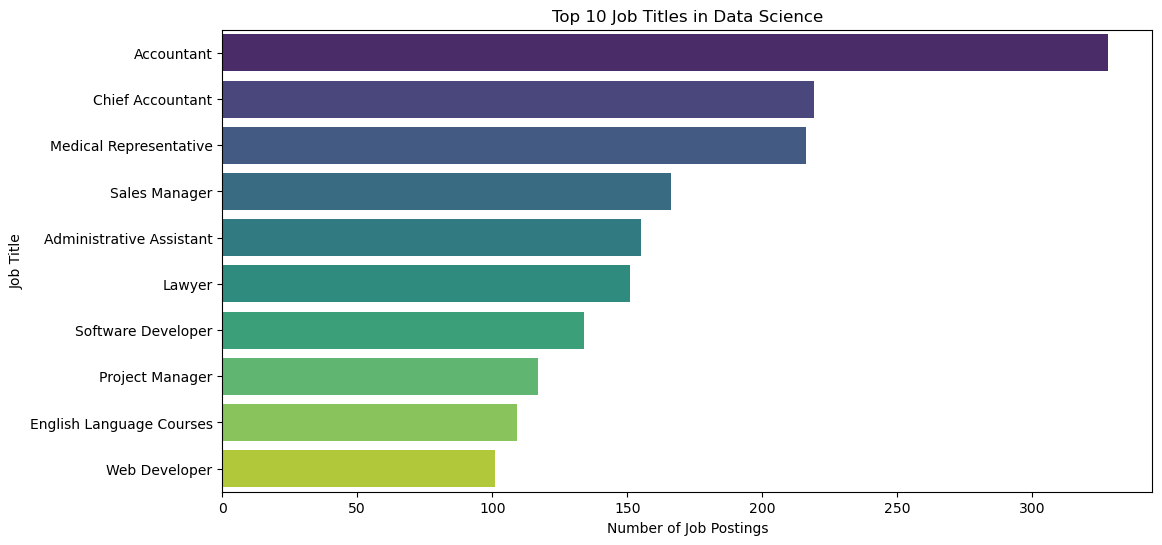

In [68]:
# Plot 1: Distribution of job titles
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Title', order=df['Title'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Job Titles in Data Science')
plt.xlabel('Number of Job Postings')
plt.ylabel('Job Title')
plt.show()


In [71]:
# Define a regex pattern to extract key requirements and qualifications
pattern = r'(?i)\b(key\s*requirements?|qualifications?)\b:(.*?)(?=\b\w+\s*:)'


In [72]:
# Define a function to extract requirements and qualifications using regex
def extract_requirements(description):
    match = re.search(pattern, description)
    if match:
        return match.group(2).strip()
    else:
        return None

In [73]:
# Apply the function to extract requirements from job descriptions
data['Extracted_Requirements'] = data['JobRequirment'].apply(extract_requirements)


/var/folders/0f/2ft5p4_s1w95mdxgp0qpp7lm0000gn/T/ipykernel_5494/2102428095.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Extracted_Requirements'] = data['JobRequirment'].apply(extract_requirements)


In [74]:
# Display the extracted requirements
print(data[['JobRequirment', 'Extracted_Requirements']].head())

                                         JobRequirment Extracted_Requirements
185  To take care of the office on there own some\r...                   None
272  Scope of work and related duties.: \r\n- Inter...                   None
274  - Intern will be based in the Public Affairs S...                   None
320  - Create and distribute marketing materials to...                   None
352  To create an open and creative atmosphere in t...                   None


In [75]:
# Example: Calculate average satisfaction score if the column exists
if 'SatisfactionScore' in data.columns:
    avg_satisfaction_score = data['SatisfactionScore'].mean()
else:
    avg_satisfaction_score = None  # Handle the absence of the column gracefully


In [76]:
# Example: Plot distribution of satisfaction scores if the column exists
if 'SatisfactionScore' in data.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(data['SatisfactionScore'], bins=10, color='skyblue', edgecolor='black')
    plt.title('Distribution of Satisfaction Scores')
    plt.xlabel('Satisfaction Score')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [77]:
#Second point implementation

In [78]:
# Count the null values in each column
null_counts = df.isnull().sum()

In [79]:
print(null_counts)

jobpost                 0
date                    0
Title                  28
Company                 7
AnnouncementCode    17793
Term                11325
Eligibility         14071
Audience            18361
StartDate            9326
Duration             8203
Location               32
JobDescription       3892
JobRequirment        2522
RequiredQual          484
Salary               9379
ApplicationP           60
OpeningDate           706
Deadline               65
Notes               16790
AboutC               6531
Attach              17442
Year                    0
Month                   0
IT                      0
dtype: int64


In [80]:
# Step 2: Define Regex pattern to match key requirements
requirements_pattern = r'\b(key\s*requirements?|qualifications?)\b:(.*?)(?=\b\w+\s*:|$)'



In [81]:
# Step 3: Apply Regex and extract key requirements
def extract_requirements(description):
    requirements_match = re.search(requirements_pattern, description, re.IGNORECASE)
    if requirements_match:
        return requirements_match.group(2).strip()
    else:
        return None



In [82]:
# Step 4: Apply the function to extract key requirements from job descriptions
df['KeyRequirements'] = df['JobRequirment'].apply(extract_requirements)



TypeError: expected string or bytes-like object, got 'float'

In [83]:
# Step 5: Display or analyze the extracted key requirements
print(df[['JobRequirment', 'KeyRequirements']].head())

KeyError: "['KeyRequirements'] not in index"

In [84]:
#Aggregated and visualized the data by using pandas, matplotlib and wordcloud to compile a professional report

In [52]:
# Example: Count the frequency of job titles
job_title_counts = df['Title'].value_counts()



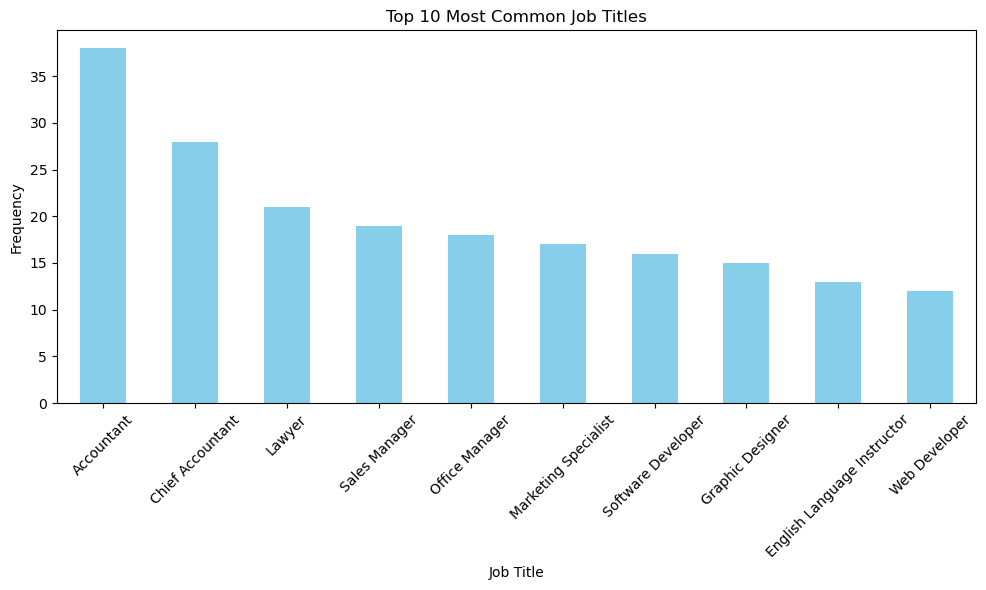

In [57]:
# Example: Generate a word cloud from job requirements
job_requirements_text = ' '.join(df['KeyRequirements'].dropna())

# Check if there are any non-empty strings in the job requirements text
if job_requirements_text.strip():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(job_requirements_text)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Job Requirements')
    plt.show()
else:
    print("No valid job requirements found to generate a word cloud.")


No valid job requirements found to generate a word cloud.


In [58]:
# Step 4: Compile Report
# Example: Print summary statistics or insights
print("Summary Statistics:")
print("Total number of job listings:", len(df))
print("Top 10 Most Common Job Titles:")
print(job_title_counts.head(10))

Summary Statistics:
Total number of job listings: 1820
Top 10 Most Common Job Titles:
Title
Accountant                     38
Chief Accountant               28
Lawyer                         21
Sales Manager                  19
Office Manager                 18
Marketing Specialist           17
Software Developer             16
Graphic Designer               15
English Language Instructor    13
Web Developer                  12
Name: count, dtype: int64
